<a href="https://colab.research.google.com/github/ADGGi/CP1/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

In [ ]:
#데이터 불러오기
import pandas as pd
import numpy as np

X_train = pd.read_csv('/content/drive/MyDrive/project1/X_train.csv')
X_train = X_train['tokens']
y_train = pd.read_csv('/content/drive/MyDrive/project1/y_train.csv')
y_train = y_train['label']
X_test = pd.read_csv('/content/drive/MyDrive/project1/X_test.csv')
X_test = X_test['tokens']
y_test = pd.read_csv('/content/drive/MyDrive/project1/y_test.csv')
y_test = y_test['label']
train = pd.read_csv('/content/drive/MyDrive/project1/train_token.csv')
train = train[['comments', 'label', 'tokens']]
test = pd.read_csv('/content/drive/MyDrive/project1/test_token.csv')
test = test[['comments', 'label', 'tokens']]

In [ ]:
str_match = [s for s in X_train if "nan" in s]
print(str_match)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


[]


In [ ]:
#각 token이 str로 묶여서 list로 변환해줌
X_train = pd.Series([[int(x) for x in string.strip('[]').split(',')] for string in X_train.tolist()])
X_test = pd.Series([[int(x) for x in string.strip('[]').split(',')] for string in X_test.tolist()])

In [ ]:
np.array(X_train)

array([list([2600, 11749, 9]),
       list([976, 16, 2, 564, 1216, 3, 814, 12, 1999, 3, 62, 28, 29, 2, 7, 9120, 2, 56, 6, 29, 24, 93, 250, 2, 68, 159, 2, 288, 11750, 635, 24, 111, 4, 161, 7553, 49, 4, 6522, 10, 20, 34, 1483, 13, 18, 59, 234, 4]),
       list([2, 685, 2831, 8, 11751, 2, 565, 10]), ...,
       list([862, 2569, 51, 271, 58, 63, 94, 883, 7, 3, 5, 29, 2, 155, 204, 13, 11, 11]),
       list([1206, 293, 13, 20, 46592, 12, 30, 362, 17]),
       list([181, 4110, 3, 34, 2914, 184, 28, 250, 2, 68])], dtype=object)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len=400
X_train = pad_sequences(np.array(X_train), maxlen=max_len)
X_test = pad_sequences(np.array(X_test), maxlen=max_len)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (42539, 400)
X_test shape: (10635, 400)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)

print('\nX_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (42539, 400)
y_train shape : (42539,)

X_test shape : (10635, 400)
y_test shape : (10635,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=722)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
#smote 후 train shape

print('X_train_smote shape :', X_train_smote.shape)
print('y_train_smote shape :', y_train_smote.shape)

X_train_smote shape : (74320, 400)
y_train_smote shape : (74320,)


In [ ]:
np.save('/content/drive/MyDrive/project1/dataset/arrayset/X_train_smote', X_train_smote)
np.save('/content/drive/MyDrive/project1/dataset/arrayset/y_train_smote', y_train_smote)
np.save('/content/drive/MyDrive/project1/dataset/arrayset/X_train', X_train)
np.save('/content/drive/MyDrive/project1/dataset/arrayset/X_test', X_test)
np.save('/content/drive/MyDrive/project1/dataset/arrayset/y_train', y_train)
np.save('/content/drive/MyDrive/project1/dataset/arrayset/y_test', y_test)

In [ ]:
from lightgbm import LGBMClassifier, Booster
from sklearn.model_selection import StratifiedGroupKFold, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

In [ ]:
#cv = StratifiedGroupKFold(n_splits=5)

In [ ]:
params = {'n_estimators':[150,200,300,400],
          'max_depth':[10,15,20,],
          'min_child_samples':[20,40,60],
          'subsample':[0.8, 1],
          'class_weight':[{0: w} for w in [1,3,5,7,9]]}

lgbm = LGBMClassifier()
clf = GridSearchCV(lgbm, param_grid=params, cv=3,
                         verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1}, {0: 3}, {0: 5}, {0: 7},
                                          {0: 9}],
                         'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'n_estimators': [150, 200, 300, 400],
                         'subsample': [0.8, 1]},
             verbose=1)

In [ ]:
print('parameters :', clf.best_params_)
print('best score :', clf.best_score_)

parameters : {'class_weight': {0: 1}, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 400, 'subsample': 0.8}
best score : 0.8749617996220199


In [ ]:
parameters = {'class_weight': {0: 1}, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 400, 'subsample': 0.8}

In [ ]:
lgbm_test = LGBMClassifier(class_weight = {0: 1},
                           max_depth = 20,
                           min_child_samples = 20,
                           n_estimators = 400,
                           subsamples = 0.8)

lgbm_test.fit(X_train, y_train)

LGBMClassifier(class_weight={0: 1}, max_depth=20, n_estimators=400,
               subsamples=0.8)

In [ ]:
y_prob = lgbm_test.predict_proba(X_test)[:, 1]
y_label = y_prob>0.5

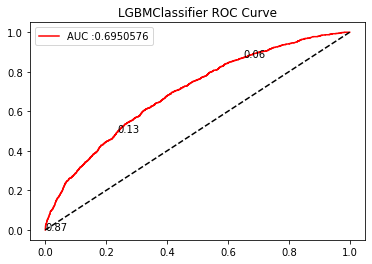

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thr = roc_curve(y_test, y_prob)

idx_list = np.arange(1, len(thr), 1000)

plt.plot(fpr, tpr,
         c='red',
         label="AUC :"+str(round(roc_auc_score(y_test, y_prob), 7)))
plt.plot([1,0], [1,0], ls='--', c='black')
plt.title("LGBMClassifier ROC Curve")
plt.legend(loc=0)
for idx in idx_list :
  text = str(round(thr[idx], 2))
  plt.text(fpr[idx], tpr[idx], text)

In [ ]:
lgbm_auc ={
    'fpr' : fpr,
    'tpr' : tpr,
    'thr' : thr
}

df=pd.DataFrame(lgbm_auc)
df.to_csv('/content/drive/MyDrive/project1/LGBMClassifier/lgbm_roc_curve.csv')

In [ ]:
import pickle
from joblib import dump, load
from tensorflow.keras.preprocessing.text import Tokenizer
import os

In [ ]:
#모델저장
dump(lgbm_test, 'LGB.pkl')

['LGB.pkl']

In [ ]:
def load_tokenizer(path):
  with open(path, 'rb') as f:
    tokenizer = pickle.load(f)
  return tokenizer

tokenizer_name = 'comments_tokenizer.pickle'
tokenizer_path = os.path.join('/content/drive/MyDrive/project1/tokenizer/comments_tokenizer.pickle')

tokenizer = load_tokenizer(tokenizer_path)

#SMOTE data set

In [ ]:
params = {'n_estimators':[150,200,300,400],
          'max_depth':[10,15,20,],
          'min_child_samples':[20,40,60],
          'subsample':[0.8, 1],
          'class_weight':[{0: w} for w in [1,3,5,7,9]]}

lgbm = LGBMClassifier()
clf = GridSearchCV(lgbm, param_grid=params, cv=3,
                         verbose=1, n_jobs=-1)
clf.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1}, {0: 3}, {0: 5}, {0: 7},
                                          {0: 9}],
                         'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'n_estimators': [150, 200, 300, 400],
                         'subsample': [0.8, 1]},
             verbose=1)

In [ ]:
print('parameters :', clf.best_params_)
print('best score :', clf.best_score_)

parameters : {'class_weight': {0: 1}, 'max_depth': 20, 'min_child_samples': 60, 'n_estimators': 400, 'subsample': 0.8}
best score : 0.7068763251407791


In [ ]:
smote_parameters = {'class_weight': {0: 1}, 'max_depth': 20, 'min_child_samples': 60, 'n_estimators': 400, 'subsample':0.8 }

In [ ]:
lgbm_smote_test = LGBMClassifier(class_weight = {0: 1},
                                 max_depth = 20,
                                 min_child_samples = 60,
                                 n_estimators = 400,
                                 subsamples = 0.8)

lgbm_smote_test.fit(X_train_smote, y_train_smote)

LGBMClassifier(class_weight={0: 1}, max_depth=20, min_child_samples=60,
               n_estimators=400, subsamples=0.8)

In [ ]:
y_prob_smote = lgbm_smote_test.predict_proba(X_test)[:, 1]
y_label = y_prob_smote>0.5

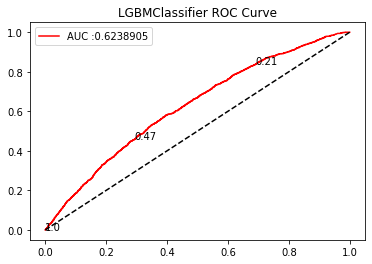

In [ ]:
fpr_smote, tpr_smote, thr_smote = roc_curve(y_test, y_prob_smote)

idx_list = np.arange(1, len(thr_smote), 1000)

plt.plot(fpr_smote, tpr_smote,
         c='red',
         label="AUC :"+str(round(roc_auc_score(y_test, y_prob_smote), 7)))
plt.plot([1,0], [1,0], ls='--', c='black')
plt.title("LGBMClassifier ROC Curve")
plt.legend(loc=0)
for idx in idx_list :
  text = str(round(thr_smote[idx], 2))
  plt.text(fpr_smote[idx], tpr_smote[idx], text)